In [1]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
from tensorflow.keras import Input
from tensorflow.keras.layers import (Layer, InputLayer, Conv2D, Lambda, Input, Flatten)
from tensorflow.keras.models import Model
from tensorflow import keras
import tensorflow_datasets as tfds
import numpy as np
import math
import copy
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import glob
import os

In [ ]:
#MNISTデータセット
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

shape = (200, 200)
x_train = np.array(list(map(lambda x : cv2.resize(x, dsize=shape), x_train)))
x_test = np.array(list(map(lambda x : cv2.resize(x, dsize=shape), x_test)))
x_train = np.where(x_train>255/2, 255, 0)
x_test = np.where(x_test>255/2, 255, 0)

In [3]:
train_num = 10
test_num = 10
total = train_num + test_num
train_data = {}
test_data = {}
for i in range(10):
  train_data[str(i)] = x_train[np.where(y_train == i)][0:train_num]
  test_data[str(i)] = x_test[np.where(y_test == i)][0:test_num]


In [ ]:
emnist_train = tfds.load(name="emnist/balanced", split="train")

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

KeyboardInterrupt: ignored

In [ ]:
emnist_train = emnist_train.shuffle(1024).batch(32).prefetch(tf.data.experimental.AUTOTUNE)
for example in emnist_train.take(1):
  image, label = example['image'], example['label']

NameError: ignored

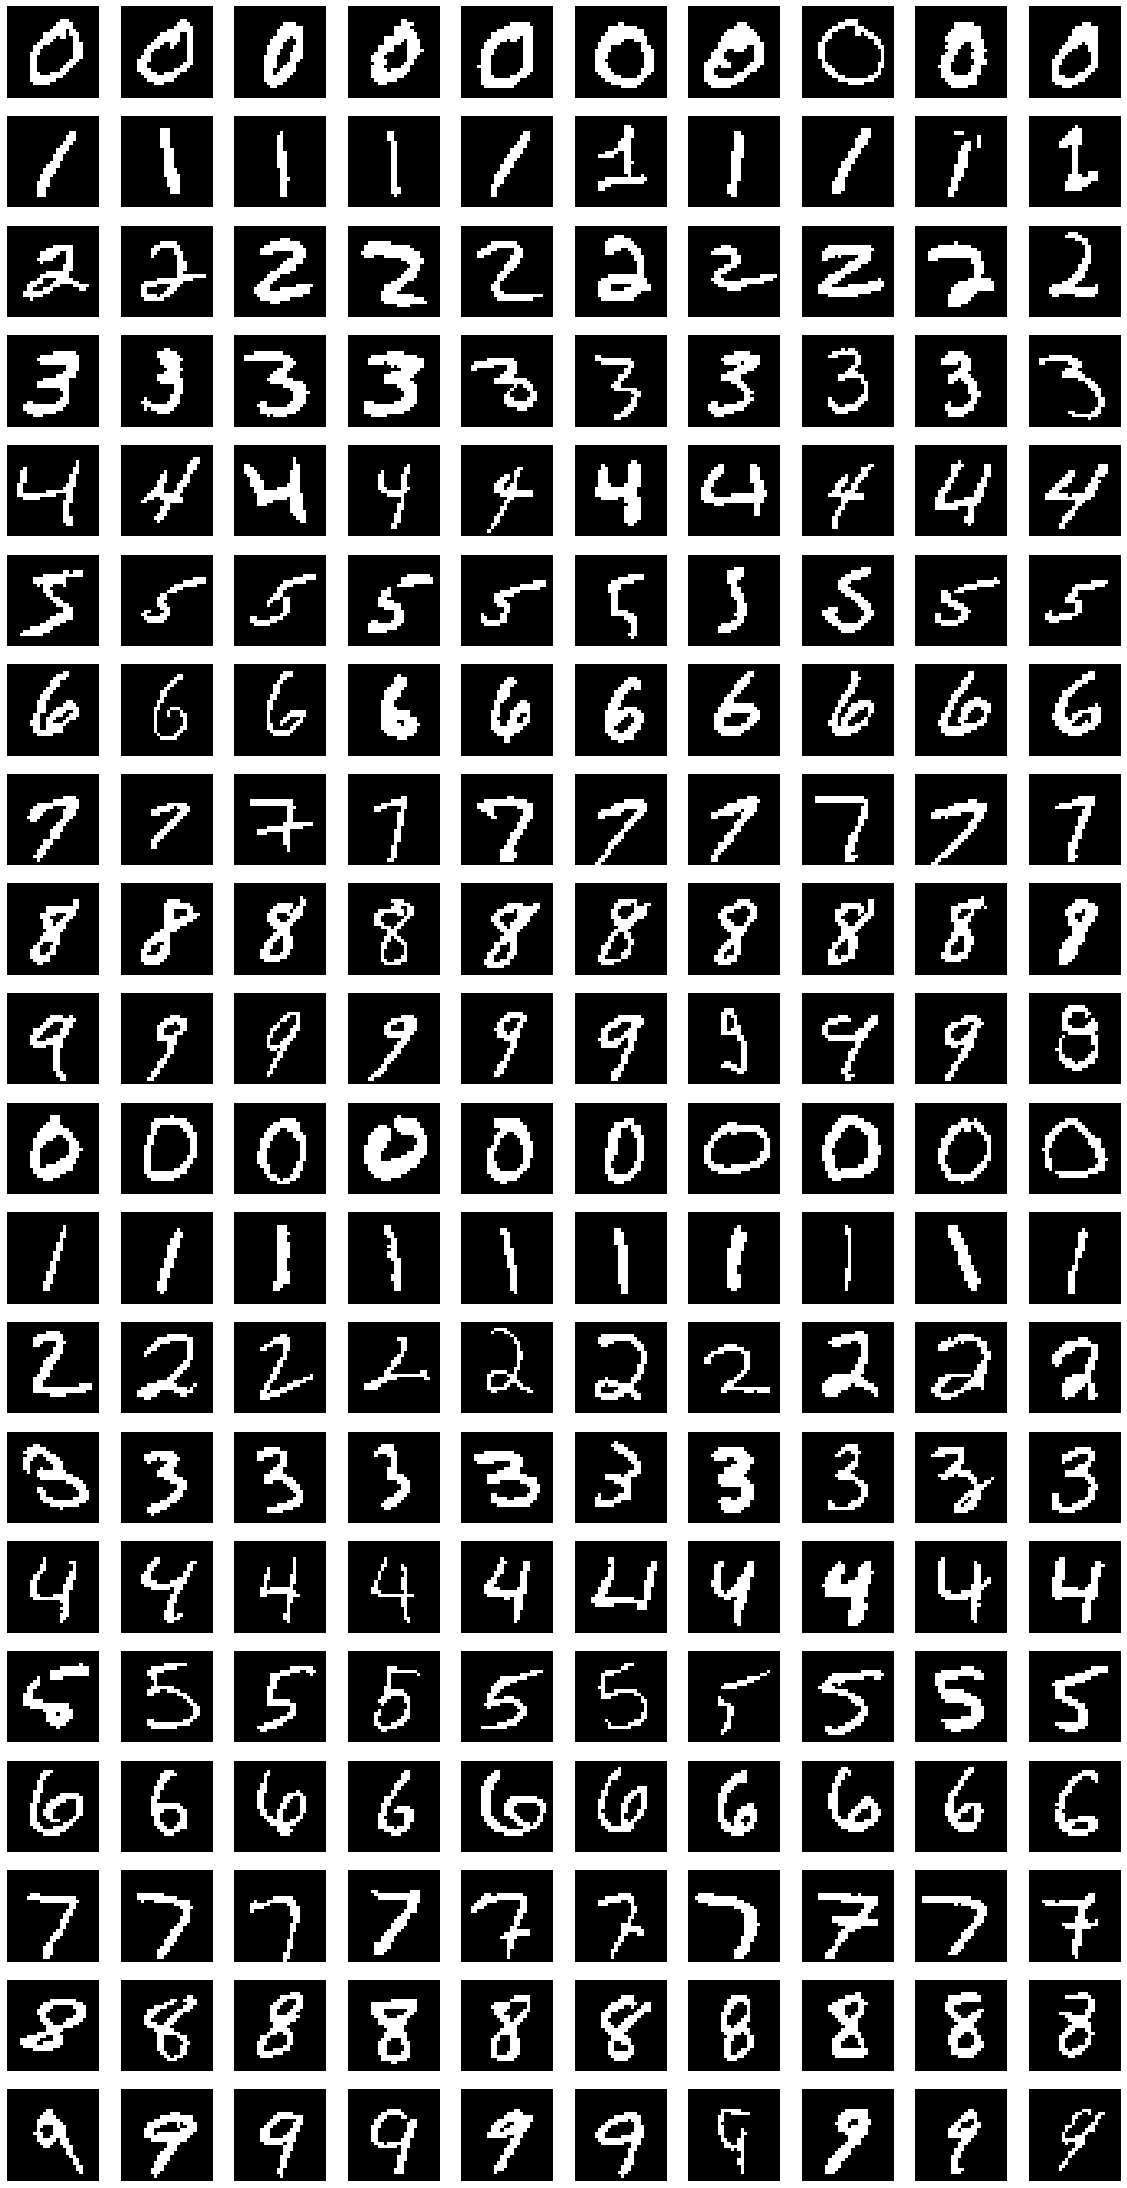

In [ ]:
fig, axes = plt.subplots(20, 10, figsize=(20,40))
for row in range(0, 10):
  for col in range(0, 10):
    axes[row, col].imshow(train_data[str(row)][col], cmap="gray")
    axes[row, col].axis("off")

for row in range(10, 20):
  for col in range(0, 10):
    axes[row, col].imshow(test_data[str(row - 10)][col], cmap="gray") 
    axes[row, col].axis("off")

In [ ]:
path = "/content/drive/MyDrive/D2NN/data/"
files = glob.glob(path + r"nut_logo_*.png")
for file in files:
  im = cv2.imread(file)
  im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
  im_fft = np.fft.fft2(im_gray)
  im_fft = np.fft.fftshift(im_fft)
  im_mag = 20*np.log(np.abs(im_fft))
  im_mag = np.where((im_mag - np.min(im_mag)) >= (np.max(im_mag) - np.min(im_mag))/2, 255, 0)
  filename = os.path.basename(file)
  cv2.imwrite(path + "fft_" + filename, im_mag)
files

['/content/drive/MyDrive/D2NN/data/nut_logo_100px.png',
 '/content/drive/MyDrive/D2NN/data/nut_logo_200px.png']

In [7]:
for i in range(10):
  for j in range(10):
    cv2.imwrite("/content/drive/MyDrive/D2NN/mask/bi_mnist_train/100px/" + "row_" + str(i) + "_col_" + str(j)+".bmp", train_data[str(i)][j])

In [ ]:
cv2.imwrite("test.bmp", train_data['5'][0,:,:])

True